# **Introduction to Probability Distribution**

## Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
from math import sqrt

In [8]:
url = "https://github.com/YannadatchO/Workspace/raw/main/teachingratings.csv"
ratings_df = pd.read_csv(url)

In [9]:
ratings_df.head(5)

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1


### Normal Distribution

A normal distribution is a bell-shaped density curve described by its mean μ and standard deviation σ. The curve is symmetrical and centered around it's mean. A normal distribution curve looks like this:

We can visualize the curve. Import norm from scipy.stat and plot graph with matplotlib

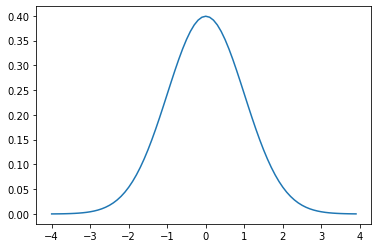

In [10]:
from scipy.stats import norm

# Plot between -4 and 4 with 0.1 steps.
x_axis = np.arange(-4, 4, 0.1)

# Mean = 0, SD = 1.
plt.plot(x_axis, norm.pdf(x_axis,0,1))
plt.show()

## Lab Exercises

### Using the teachers' rating dataset, what is the probability of receiving an evaluation score of greater than 4.5

Find the mean and standard deviation of teachers' evaluation scores

In [20]:
eval_mean = round(ratings_df['eval'].mean(),3)    #round (number, digits)
eval_sd = round(ratings_df['eval'].std(),3)
print(eval_mean,eval_sd)

3.998 0.555


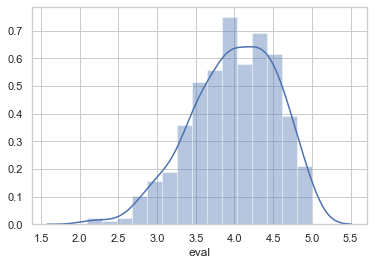

In [21]:
sns.set(style = 'whitegrid')
sns.distplot(ratings_df['eval'], kde = True)
plt.show()

Use the scipy.stats module. Because python only looks to the left i.e. less than, we do remove the probability from 1 to get the other side of the tail

In [48]:
prob_less_than45 = scipy.stats.norm.cdf((4.5-eval_mean)/ eval_sd)
prob_greater_than45 = (1-prob_less_than45)
print("probability eval score greater than 4.5 :", prob_greater_than45)

probability eval score greater than 4.5 : 0.1828639734596742


### Using the teachers' rating dataset, what is the probability of receiving an evaluation score greater than 3.5 and less than 4.2

First we find the probability of getting evaluation scores less than 3.5 using the <code>norm.cdf</code> function

In [38]:
prob_less_than35 = scipy.stats.norm.cdf((3.5-eval_mean)/eval_sd)
prob_less_than35

0.1847801491443654

In [3]:
prob_lessthan = scipy.stats.norm.cdf((6.90-5.85)/0.35)
1-prob_lessthan

0.0013498980316301035

Then for less than 4.2

In [39]:
prob_less_than42 = scipy.stats.norm.cdf((4.2-eval_mean)/eval_sd)
prob_less_than42

0.642057540461896

The probability of a teacher receiving an evaluation score that is between 3.5 and 4.2 is:

In [51]:
prob_between_42_35 = round((prob_less_than42-prob_less_than35),3) 
print(" probability eval score between 4.2 and 3.5 :", prob_between_42_35)

 probability eval score between 4.2 and 3.5 : 0.457


### Using the two-tailed test from a normal distribution:

-   A professional  basketball  team wants to compare its performance with  that of players  in a regional league.
-   The pros are known to have a historic mean of 12 points  per game with  a standard  deviation  of 5.5. 
-   A group  of 36 regional players recorded on average 10.7 points  per game.
-   The pro coach would like to know whether  his professional  team scores on average are different from that of the regional players.


State the null hypothesis

-   $H_0$: $x = µ_1$ ("The mean point of the regional players is not different from the historic mean")
-   $H_1$: $x ≠ µ_1$ ("The mean point of the regional players is different from the historic mean")


When the population standard deviation is given and we are asked to deal with a sub-sample, the size (n) of the sub-sample is used in the formula:


## $Z$ = $(\frac{\bar x - \mu}{\sigma _/ \sqrt{n}})$

In [57]:
## because it is a two-tailed test we multiply by 2
print ("P-Value: ", 2*round(scipy.stats.norm.cdf((10.7-12)/(5.5/sqrt(36))),3))

P-Value:  0.156


**Conclusion:** Because the p-value is greater than 0.05, we fail  to reject the null hypothesis as there is no sufficient evidence to prove that the mean point of the regional players is different from the historic mean

## Practice Questions

### Question 1: Using the teachers' rating dataset, what is the probability of receiving an evaluation score greater than 3.3?

In [59]:
prob_less_than33 = scipy.stats.norm.cdf((3.3-eval_mean)/eval_sd)
prob_greater_than33 = 1-prob_less_than33
print(" probability eval score greater than 3.3 :", prob_greater_than33)

 probability eval score greater than 3.3 : 0.8957422041794154


### Question 2: Using the teachers' rating dataset, what is the probability of receiving an evaluation score between 2 and 3?

In [61]:
prob_less_than3 = scipy.stats.norm.cdf((3-eval_mean)/eval_sd)
prob_less_than2 = scipy.stats.norm.cdf((2-eval_mean)/eval_sd)
prob_between_3_2 = prob_less_than3 - prob_less_than2
print("probability of receiving an evaluation score between 2 and 3 : ", prob_between_3_2)

probability of receiving an evaluation score between 2 and 3 :  0.03591369391246606


### Question 3: To test the hypothesis that sleeping for at least 8 hours makes one smarter, 12 people who have slept for at least 8 hours every day  for the past one year  have their IQ tested.

-   Here are the results: 116, 111, 101, 120, 99, 94, 106, 115, 107, 101, 110, 92
-   Test using the following hypotheses: H0: μ = 100 or Ha: μ > 100 

In [63]:
iq_df =[116, 111, 101, 120, 99, 94, 106, 115, 107, 101, 110, 92]
iq_mean =np.mean([116, 111, 101, 120, 99, 94, 106, 115, 107, 101, 110, 92])
iq_sd = np.std([116, 111, 101, 120, 99, 94, 106, 115, 107, 101, 110, 92])
print(iq_mean,iq_sd)

106.0 8.455767262643882


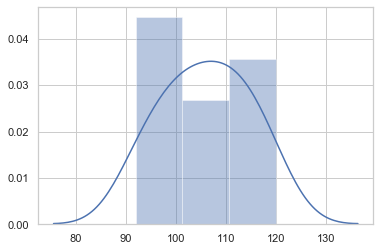

In [66]:
sns.distplot(iq_df, kde = True)

In [67]:
round(1-scipy.stats.norm.cdf((iq_mean - 100)/(iq_sd /sqrt(12))),3)

0.007

**Conclusion:** Because the p-value is less than 0.05, we acept the null hypothesis 